In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels
from scipy import stats
from scipy.stats import boxcox
import scipy
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportions_chisquare
from sklearn.metrics import ConfusionMatrixDisplay

In [7]:
SolarState = pd.read_excel('C:/Users/arica/OneDrive/Desktop/course work/FinalProject/Week3.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/arica/OneDrive/Desktop/course work/FinalProject/Week3.xlsx'

In [8]:
SolarState.head()

NameError: name 'SolarState' is not defined

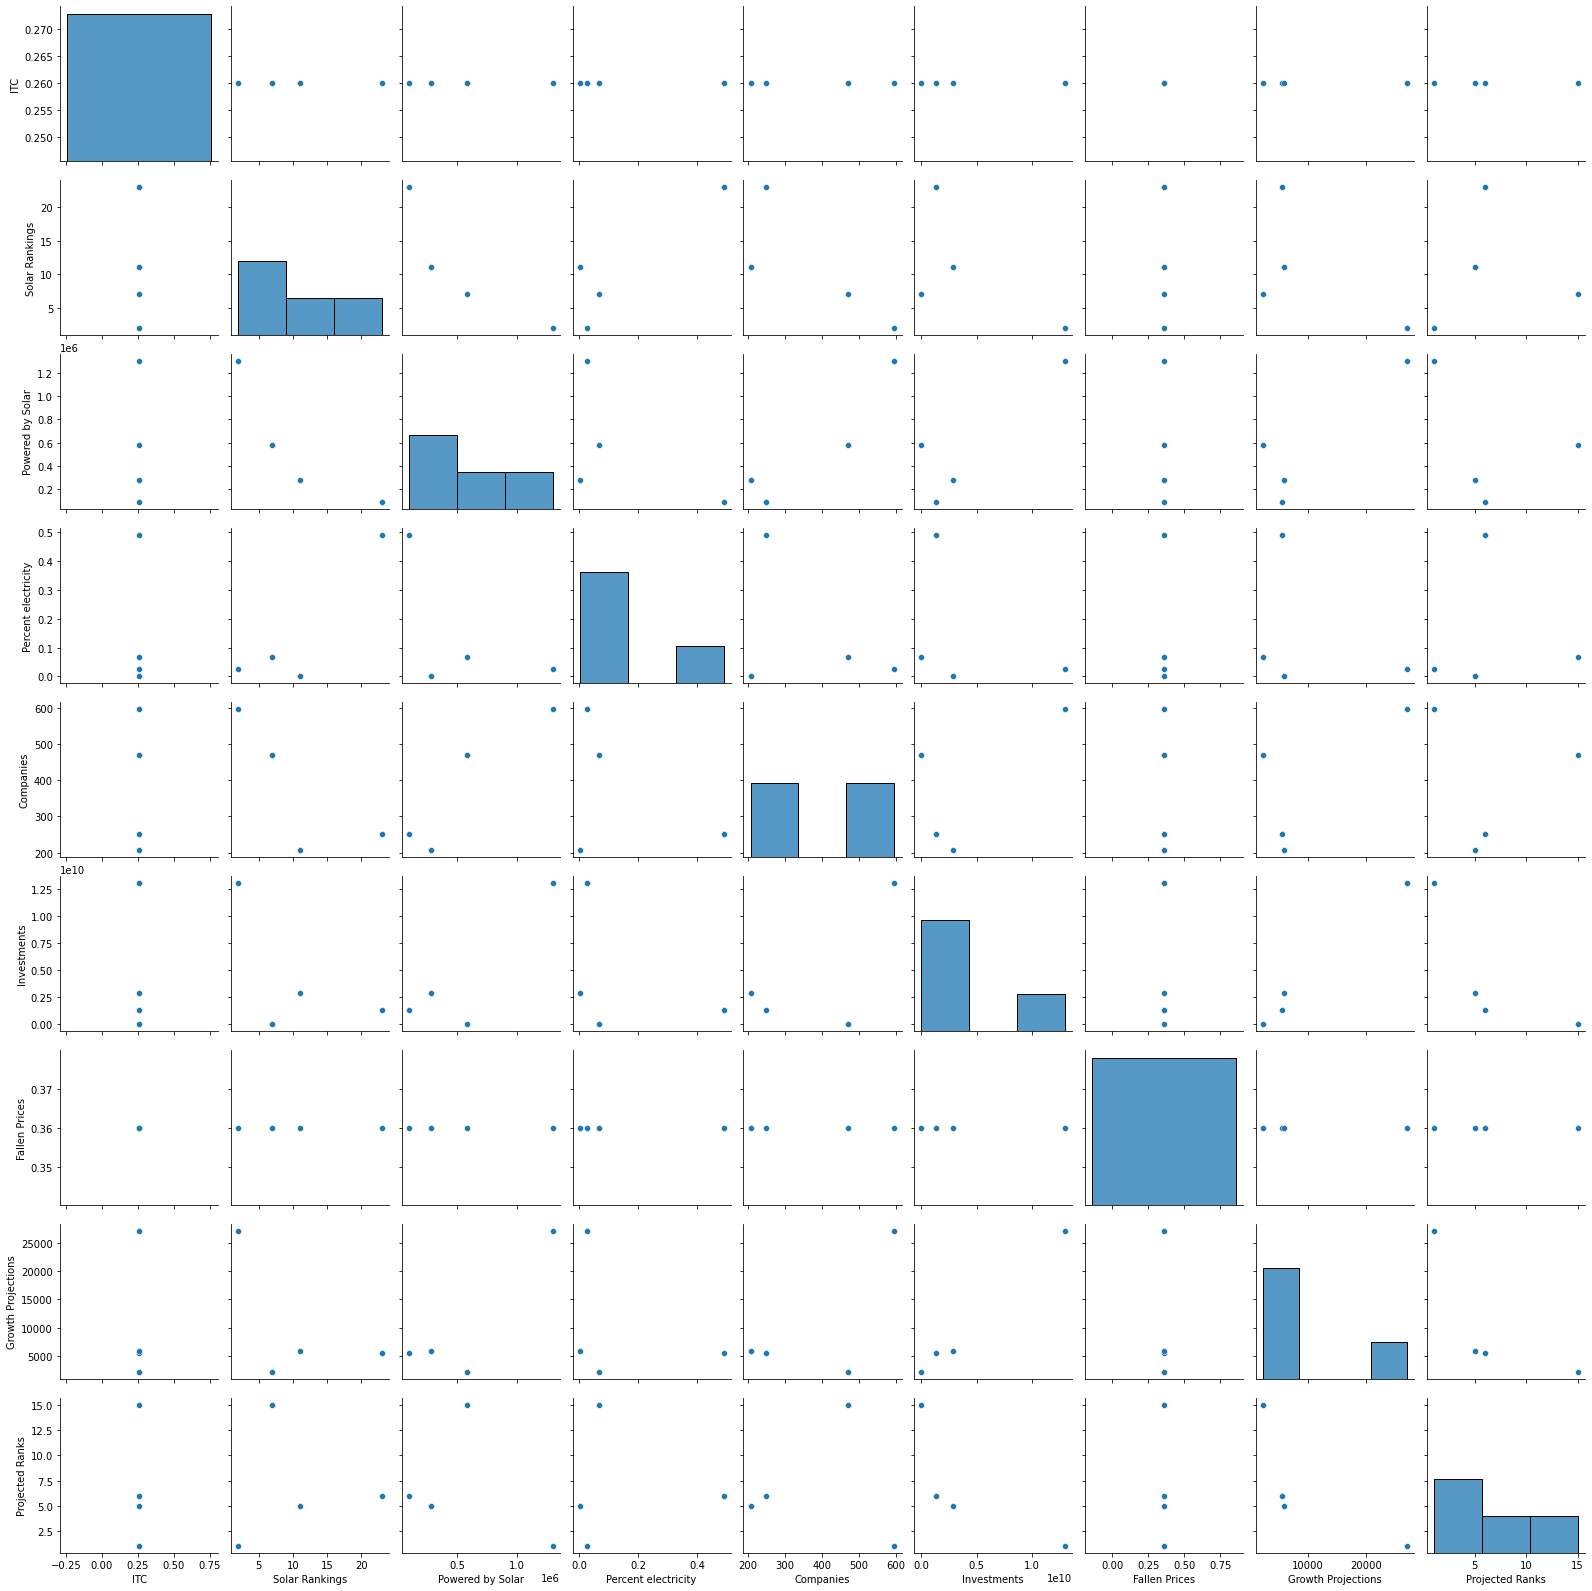

In [4]:
sns.pairplot(SolarState)

# As per the results from Seia.Org Texas is the highest Solar Power generation and rankings

In [5]:
continuous_vars = ['Solar Rankings','Powered by Solar','Percent electricity','Companies','Investments','Fallen Prices','Growth Projections','Projected Ranks']

In [6]:
SolarState['Solar Rankings']

0     7
1    23
2     2
3    11
Name: Solar Rankings, dtype: int64

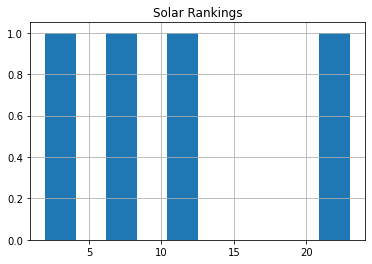

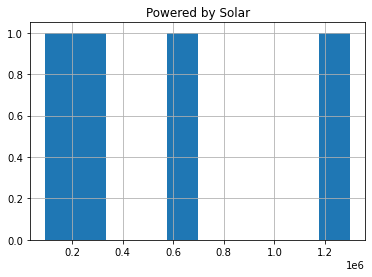

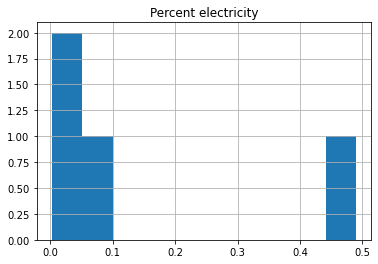

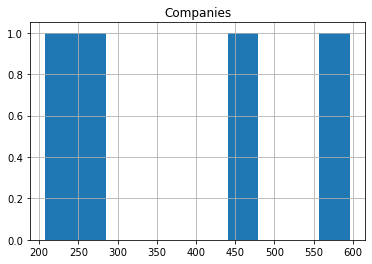

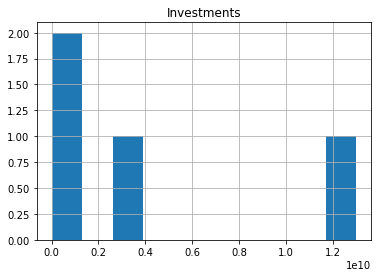

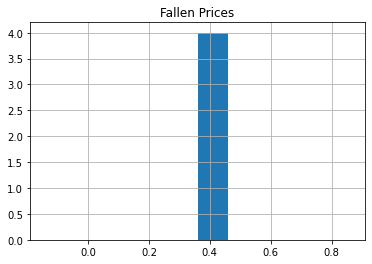

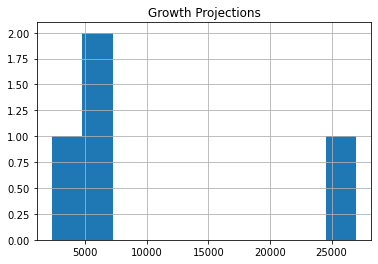

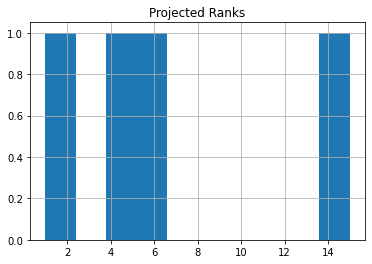

In [7]:
for cv in continuous_vars:
    SolarState[cv].hist()
    plt.title(cv)
    plt.show()

<AxesSubplot:xlabel='Powered by Solar', ylabel='Percent electricity'>

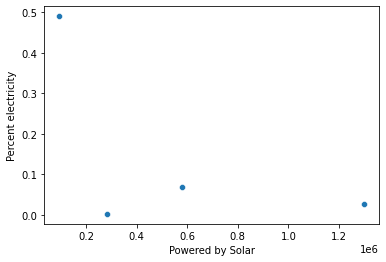

In [8]:
sns.scatterplot(x='Powered by Solar', y= 'Percent electricity', data=SolarState)

<AxesSubplot:>

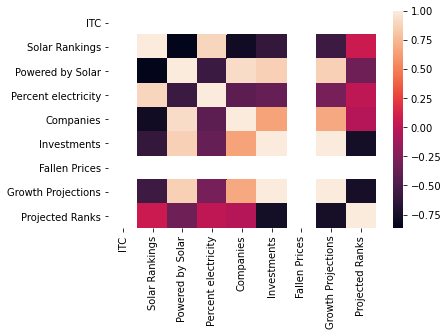

In [9]:
sns.heatmap(SolarState.corr())

In [10]:
SolarState["State"].values

array(['NJ', 'OH', 'TX', 'VA'], dtype=object)

In [11]:
SolarState['Region'] = SolarState["State"].replace(['NJ', 'OH', 'TX', 'VA'],
                                                   ["Northeast", "Midwest", "Southwest", "Southeast"])

In [12]:
SolarState

,State,ITC,Solar Rankings,Powered by Solar,Percent electricity,Companies,Investments,Fallen Prices,Growth Projections,Projected Ranks,Region
0,NJ,0.26,7,579272,0.06790,470,11100000,0.36,2284,15,Northeast
1,OH,0.26,23,95263,0.49000,251,1300000000,0.36,5596,6,Midwest
2,TX,0.26,2,1297592,0.02610,596,13000000000,0.36,26995,1,Southwest
3,VA,0.26,11,283853,0.00257,208,2900000000,0.36,5872,5,Southeast


In [14]:
SolarState.groupby("Region").mean()

,ITC,Solar Rankings,Powered by Solar,Percent electricity,Companies,Investments,Fallen Prices,Growth Projections,Projected Ranks
Region,,,,,,,,,
Midwest,0.26,23,95263,0.49000,251,1300000000,0.36,5596,6
Northeast,0.26,7,579272,0.06790,470,11100000,0.36,2284,15
Southeast,0.26,11,283853,0.00257,208,2900000000,0.36,5872,5
Southwest,0.26,2,1297592,0.02610,596,13000000000,0.36,26995,1


In [15]:
SolarState.groupby("Region").median()

,ITC,Solar Rankings,Powered by Solar,Percent electricity,Companies,Investments,Fallen Prices,Growth Projections,Projected Ranks
Region,,,,,,,,,
Midwest,0.26,23,95263,0.49000,251,1300000000,0.36,5596,6
Northeast,0.26,7,579272,0.06790,470,11100000,0.36,2284,15
Southeast,0.26,11,283853,0.00257,208,2900000000,0.36,5872,5
Southwest,0.26,2,1297592,0.02610,596,13000000000,0.36,26995,1


In [16]:
SolarState.groupby("Region").std()

,ITC,Solar Rankings,Powered by Solar,Percent electricity,Companies,Investments,Fallen Prices,Growth Projections,Projected Ranks
Region,,,,,,,,,
Midwest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Northeast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Southeast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Southwest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#Basic Anoca for regions and an important 